# Anomaly Detection

The objective of this notebook is to create a reconstruction autoencoder AI model to detect ssh login intrusion.

In [53]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns

from keras.models import Model, Sequential
from keras.layers import Dense
from keras import Input, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

sns.set(font_scale=1.4)
sns.set_style("white")
sns.set_style("ticks")

The following data is extracted from the syslog of a Linux VM on Azure. "myazure1" is a valid user that has successfully logged into the VM several times. Other users are unsuccessfully tried by the bots on the internet. Although the data is labelled, the labels are used only to validate the efficacy of the model.

The definition of the data attributes are given below
- **login_success** - Whether the SSH login is successful (1) or not (0)
- **wrong_password** - Whether the SSH password was wrong (1) or correct (0)
- **invalid_user** - Whether the SSH user is invalid (1) or valid (0)
- **last_login_success** - Whether the given user's last login was successful (1) or not (0)
- **last_ip_login_failure** - Whether the source IP and user combination failed to login last time (1) or not (0)
- **anomaly** - Whether there  is anomaly (1) or not (0). All the users tried by the bots on the internet are marked as anomaly

In [54]:
PATH_TO_DATA = 'https://raw.githubusercontent.com/saptarshibasu/anomaly-detection/main/sample-data/sshlogin_3.csv'

data = pd.read_csv(PATH_TO_DATA, header = 0)

data.head(100)

,login_success,wrong_password,invalid_user,last_login_success,last_ip_login_failure,user,source_ip,source_port,anomaly
0,0,0,1,0,0,profile1,102.22.177.9,50290,1
1,0,0,1,0,1,profile1,102.22.177.9,56554,1
2,0,0,1,0,1,profile1,102.22.177.9,51287,1
3,0,0,1,0,1,profile1,102.22.177.9,65310,1
4,0,0,1,0,0,user1,102.22.177.9,65164,1
...,...,...,...,...,...,...,...,...,...
95,0,1,0,0,0,root,138.197.180.102,35634,1
96,1,0,0,1,0,myazure1,223.191.32.164,41570,0
97,1,0,0,1,0,myazure1,223.191.32.164,41569,0
98,0,0,1,0,0,tech,49.234.5.191,52984,1


### Data Preparation

In [55]:
TARGET = 'anomaly'
USER = 'user'
SOURCE_IP = 'source_ip'
SOURCE_PORT = 'source_port'

features = data.drop([TARGET, USER, SOURCE_IP, SOURCE_PORT], axis=1) / 2
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

train_index = y_train[y_train == 0].index
train_data = x_train   #.loc[train_index]
target_data = y_train   #.loc[train_index]

features.head()

,login_success,wrong_password,invalid_user,last_login_success,last_ip_login_failure
0,0.0,0.0,0.5,0.0,0.0
1,0.0,0.0,0.5,0.0,0.5
2,0.0,0.0,0.5,0.0,0.5
3,0.0,0.0,0.5,0.0,0.5
4,0.0,0.0,0.5,0.0,0.0


### Reconstruction Autoencoder Model

In [56]:
model = Sequential(
[
    Input(shape = (train_data.shape[1],)),
    Dense(5, activation=tf.nn.relu),
    Dense(3, activation=tf.nn.relu),
    Dense(5, activation=tf.nn.sigmoid)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = model.fit(train_data, train_data, 
          epochs=1000,
          batch_size=200,
          shuffle=True,
          validation_split=0.3,
          callbacks=[
              callbacks.EarlyStopping(monitor="val_loss", patience=5)
          ],
        )


Epoch 1/1000
2/2 [==============================] - 2s 519ms/step - loss: 0.1552 - val_loss: 0.1542
Epoch 2/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.1543 - val_loss: 0.1538
Epoch 3/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.1545 - val_loss: 0.1535
Epoch 4/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.1541 - val_loss: 0.1531
Epoch 5/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.1543 - val_loss: 0.1528
Epoch 6/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.1536 - val_loss: 0.1525
Epoch 7/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.1531 - val_loss: 0.1521
Epoch 8/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.1522 - val_loss: 0.1518
Epoch 9/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.1525 - val_loss: 0.1515
Epoch 10/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.1520 - val_loss: 0.1511
Epoch 11

2/2 [==============================] - 0s 56ms/step - loss: 0.0849 - val_loss: 0.0825
Epoch 82/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.0834 - val_loss: 0.0811
Epoch 83/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0817 - val_loss: 0.0797
Epoch 84/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0807 - val_loss: 0.0784
Epoch 85/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0795 - val_loss: 0.0770
Epoch 86/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0778 - val_loss: 0.0757
Epoch 87/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0772 - val_loss: 0.0744
Epoch 88/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0754 - val_loss: 0.0731
Epoch 89/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0741 - val_loss: 0.0719
Epoch 90/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0727 - val_loss: 0.0707
Epoch 91/1000


2/2 [==============================] - 0s 54ms/step - loss: 0.0253 - val_loss: 0.0241
Epoch 163/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0258 - val_loss: 0.0238
Epoch 164/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0250 - val_loss: 0.0236
Epoch 165/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.0247 - val_loss: 0.0233
Epoch 166/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0237 - val_loss: 0.0231
Epoch 167/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0243 - val_loss: 0.0228
Epoch 168/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0244 - val_loss: 0.0226
Epoch 169/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0237 - val_loss: 0.0223
Epoch 170/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0233 - val_loss: 0.0221
Epoch 171/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0229 - val_loss: 0.0219
Epoch

2/2 [==============================] - 0s 42ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 244/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 245/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0117 - val_loss: 0.0114
Epoch 246/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0117 - val_loss: 0.0113
Epoch 247/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0109 - val_loss: 0.0112
Epoch 248/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 249/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 250/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 251/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 252/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.0100 - val_loss: 0.0107
Epoch

2/2 [==============================] - 0s 43ms/step - loss: 0.0068 - val_loss: 0.0072
Epoch 325/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 326/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 327/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 328/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 329/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 330/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 331/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0064 - val_loss: 0.0070
Epoch 332/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0062 - val_loss: 0.0069
Epoch 333/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0062 - val_loss: 0.0069
Epoch

2/2 [==============================] - 0s 53ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 406/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.0040 - val_loss: 0.0052
Epoch 407/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 408/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 409/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 410/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0040 - val_loss: 0.0051
Epoch 411/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0040 - val_loss: 0.0051
Epoch 412/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.0040 - val_loss: 0.0051
Epoch 413/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 414/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0042 - val_loss: 0.0050
Epoch

2/2 [==============================] - 0s 51ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 487/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.0026 - val_loss: 0.0041
Epoch 488/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0029 - val_loss: 0.0041
Epoch 489/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0028 - val_loss: 0.0041
Epoch 490/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0029 - val_loss: 0.0040
Epoch 491/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0029 - val_loss: 0.0040
Epoch 492/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 493/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0027 - val_loss: 0.0040
Epoch 494/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 495/1000
2/2 [==============================] - 0s 60ms/step - loss: 0.0027 - val_loss: 0.0040
Epoch

2/2 [==============================] - 0s 43ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 568/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 569/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 570/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 571/1000
2/2 [==============================] - ETA: 0s - loss: 0.002 - 0s 42ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 572/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 573/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 574/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 575/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 576/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.0022 

Epoch 648/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 649/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 650/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 651/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 652/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 653/1000
2/2 [==============================] - ETA: 0s - loss: 0.001 - 0s 41ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 654/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 655/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 656/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 657/1000
2/2 [==============================] - 0s 47ms/step 

2/2 [==============================] - 0s 42ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 729/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 730/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 731/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 732/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 733/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 734/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 735/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 736/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 737/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch

2/2 [==============================] - 0s 42ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 810/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 811/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 812/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 813/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 814/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 815/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 816/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 817/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 818/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch

Epoch 890/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 891/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 892/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 893/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 894/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 895/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 896/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 897/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 898/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 899/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0011 - val_los

Epoch 970/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 971/1000
2/2 [==============================] - 0s 43ms/step - loss: 9.7513e-04 - val_loss: 0.0026
Epoch 972/1000
2/2 [==============================] - 0s 42ms/step - loss: 9.6140e-04 - val_loss: 0.0026
Epoch 973/1000
2/2 [==============================] - 0s 44ms/step - loss: 9.9893e-04 - val_loss: 0.0026
Epoch 974/1000
2/2 [==============================] - 0s 43ms/step - loss: 9.1389e-04 - val_loss: 0.0026
Epoch 975/1000
2/2 [==============================] - 0s 42ms/step - loss: 9.0811e-04 - val_loss: 0.0026
Epoch 976/1000
2/2 [==============================] - 0s 42ms/step - loss: 8.9330e-04 - val_loss: 0.0026
Epoch 977/1000
2/2 [==============================] - 0s 42ms/step - loss: 8.7204e-04 - val_loss: 0.0026
Epoch 978/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 979/1000
2/2 [==============================] - 0s 43ms/s

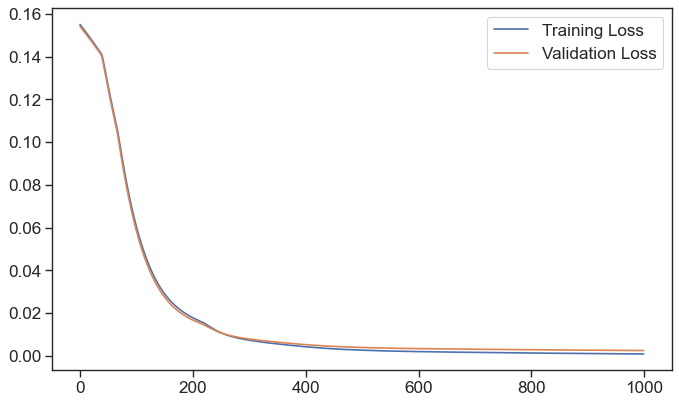

In [57]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

### Identify Reconstruction Error Threshold for Identifying Anomaly

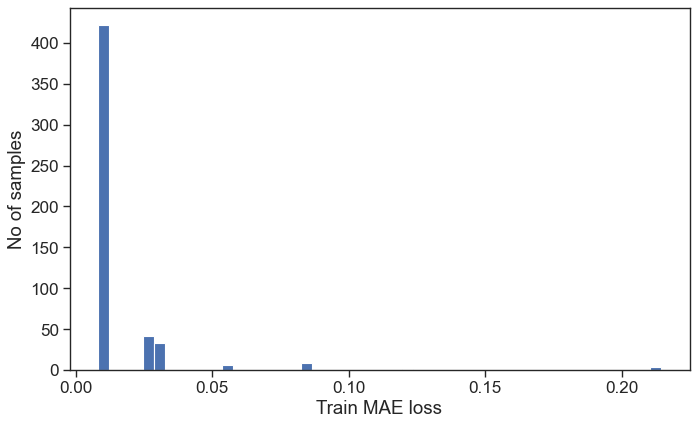

Reconstruction error threshold:  0.008064860105514526


In [58]:
train_pred = model.predict(train_data)
train_mae_loss = np.mean(np.abs(train_pred - train_data), axis=1)

train_mae_loss_df = train_mae_loss.to_frame()
train_mae_loss_df.columns = ['anomaly']
train_mae_loss_counts_df = train_mae_loss_df.groupby(['anomaly']).size().reset_index(name='counts')
threshold = train_mae_loss_counts_df[train_mae_loss_counts_df["counts"] > 60]['anomaly'].max()

plt.figure(figsize=(10, 6), dpi=80)
plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

print("Reconstruction error threshold: ", threshold)

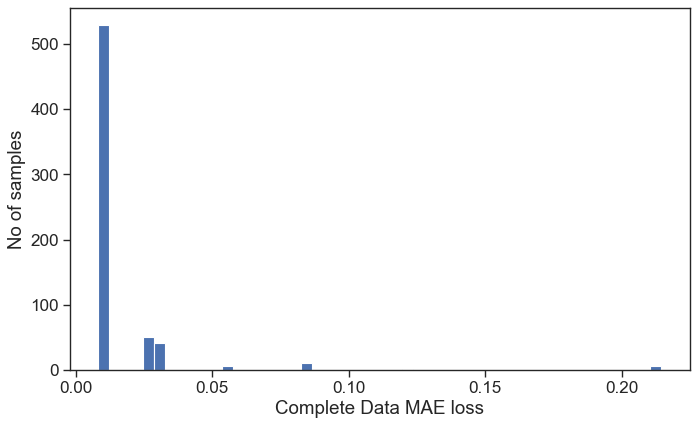

In [59]:
features_pred = model.predict(features)
features_mae_loss = np.mean(np.abs(features_pred - features), axis=1)

plt.figure(figsize=(10, 6), dpi=80)
plt.hist(features_mae_loss, bins=50)
plt.xlabel("Complete Data MAE loss")
plt.ylabel("No of samples")
plt.show()


### Mark The Record As Anomaly If Reconstruction Error Is Above Threshold

In [51]:
features_loss = features_mae_loss.to_frame()

features_loss.columns = ['anomaly']

features_loss.loc[features_loss.anomaly > threshold, "anomaly"] = 1
features_loss.loc[features_loss.anomaly <= threshold, "anomaly"] = 0

(646, 1)

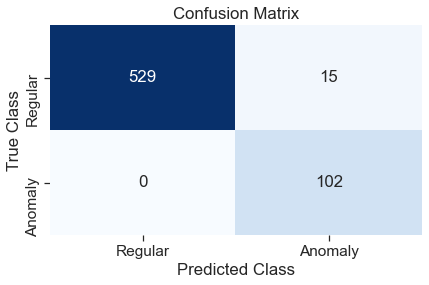

In [52]:
target.columns = ['anomaly']

matrix = confusion_matrix(target, features_loss)
confusion_df = pd.DataFrame(matrix, index = ['Regular', 'Anomaly'], columns = ['Regular', 'Anomaly'])

sns.heatmap(confusion_df, annot=True, fmt="d", cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

### View The False Positive Cases

In [50]:
indexmae = features_mae_loss[features_mae_loss>threshold].index

anomalies = data.loc[indexmae]

anomalies[anomalies['anomaly'] == 0]

,login_success,wrong_password,invalid_user,last_login_success,last_ip_login_failure,user,source_ip,source_port,anomaly
12,0,1,0,0,0,myazure1,182.66.55.189,36534,0
25,1,0,0,0,0,myazure1,223.191.32.164,51625,0
64,0,1,0,1,0,myazure1,223.191.32.164,18245,0
78,1,0,0,0,1,myazure1,223.191.32.164,3150,0
88,0,1,0,1,0,myazure1,223.191.32.164,37394,0
89,1,0,0,0,1,myazure1,223.191.32.164,51287,0
162,0,1,0,1,0,myazure1,223.191.32.164,46984,0
163,1,0,0,0,1,myazure1,223.191.32.164,3145,0
222,0,1,0,1,0,myazure1,223.191.32.164,46988,0
223,1,0,0,0,1,myazure1,223.191.32.164,40086,0
